In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
import time



In [2]:
def splitData(dataX, dataY, percentage):
    dataXTrain, dataXTest, dataYTrain, dataYTest = train_test_split(
        dataX,dataY, test_size=percentage, random_state=0)
    return dataXTrain, dataXTest, dataYTrain, dataYTest

In [3]:
#this entire function is from sklearn library with a small tweaked
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5),):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,scoring=scoring,cv=cv,n_jobs=n_jobs,
                                                                          train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print(test_scores_mean[-1])

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(train_sizes,test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std,alpha=0.1,color="g",)
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [4]:
def gridSearch(x,y,model,parameter, nfolds):
    #create a dictionary of all values we want to test
    param_grid = parameter
    # decision tree model
    #use gridsearch to test all values
    grid = GridSearchCV(model, param_grid, cv=nfolds)
    #fit model to data
    grid.fit(x, y)
    return grid

In [41]:
def estimateScore(estimator, xTrain,yTrain,xTest,yTest, name):
    if not(type(estimator) is KNeighborsClassifier) :
        clf = estimator.set_params(random_state=0)
    
    start = time.time()
    clf = estimator.fit(xTrain,yTrain)
    end = time.time()
    fit = end-start
    
    y_predTrain = clf.predict(xTrain)
    
    start = time.time()
    y_predTest = estimator.predict(xTest)
    end = time.time()
    pred = end - start
    
    model_name = type(estimator).__name__
    scoreTrain = accuracy_score(y_predTrain, yTrain )
    scoreTest = accuracy_score(y_predTest, yTest)
    
    print("Result from "+ model_name +" for "+name+":")
    print("Train Accuracy:", scoreTrain)
    print("Test Accuracy:", scoreTest)
    print("Time to fit for: " +str(fit))
    print("Time to predict for: " + str(pred))


    

In [6]:
def val_curve(estimator, x, y, param_name, param_range,  cv=5, scoring="accuracy", ):
    train, test = validation_curve(estimator, x, y, param_name = param_name, param_range = param_range,  cv=cv, scoring=scoring)
    trainMean = np.mean(train, axis=1)
    trainStd = np.std(train, axis=1)
    testMean = np.mean(test, axis=1)
    testStd = np.std(test, axis=1)
    return trainMean, trainStd, testMean, testStd

def plot_val_curve(param_name, param_range,trainMean,trainStd, testMean, testStd):


    fig , axes = plt.subplots(1,1 ,figsize=(10, 5))

    axes.fill_between(param_range,testMean - testStd,testMean + testStd,alpha=0.1,color="g")
    axes.plot( param_range, testMean, "o-",color="g", label="Cross-validation score")

    axes.fill_between(param_range,trainMean - trainStd,trainMean + trainStd,alpha=0.1,color="r")
    axes.plot( param_range, trainMean, "o-",color="r", label="training score")

    axes.set_xlabel(param_name)

    axes.set_ylabel("Score")
    axes.set_title("validation curve " +"for "+param_name)
    axes.legend(loc="best")
    return plt


    
    

In [7]:
spamHeader = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 
'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 
'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 
'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'average', 'longest', 'total' , 'spam' ]

wine = pd.read_csv("data/wine/winequality-white.csv" , sep=';')
spam = pd.read_csv("data/spam/spambase.data", header=None, names=spamHeader)

wineHeader = wine[:-1].columns

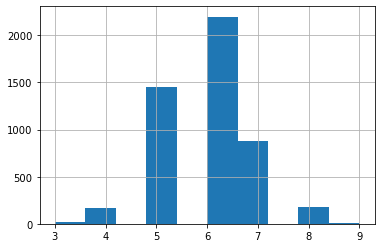

In [8]:
conditions = [
    (wine['quality'] <= 6),
    (wine['quality'] > 6) 
    ]
values = [0, 1]
wine['good_quality'] = np.select(conditions, values)
wine['quality'].hist()

wineY = wine['good_quality']
wineX = wine.drop(columns=['good_quality','quality'])


C:\Users\Luan\AppData\Local\Temp/ipykernel_14304/568640623.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  wine.hist(ax = axe)
C:\Users\Luan\AppData\Local\Temp/ipykernel_14304/568640623.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  spam.hist(ax = axe,density = True)


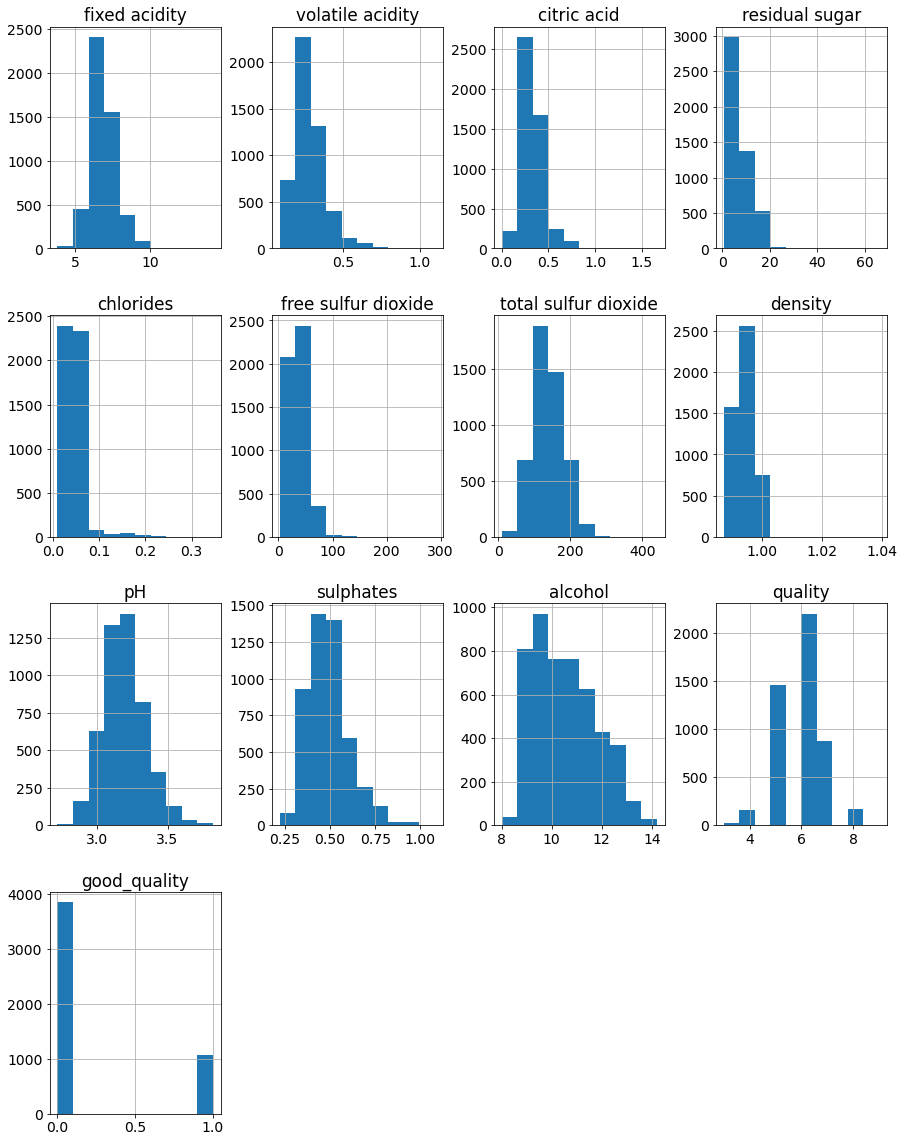

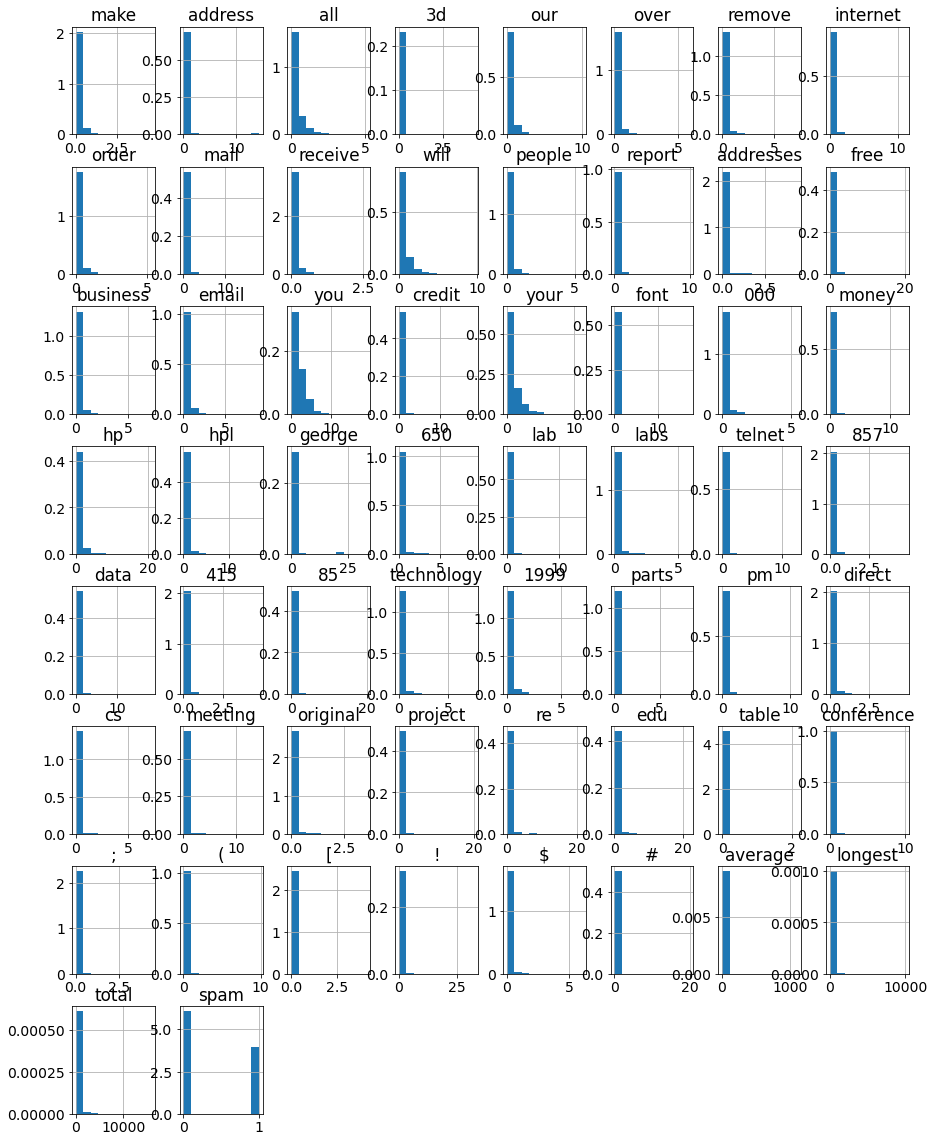

In [9]:
font = {'size'   : 14}

plt.rc('font', **font)
fig = plt.figure(figsize = (15,20))
axe = fig.gca()
                 
wine.hist(ax = axe)



fig = plt.figure(figsize = (15,20))
axe = fig.gca()
spam.hist(ax = axe,density = True)




Text(0.5, 1.0, 'good vs bad quality')

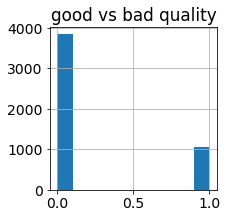

In [10]:
fig = plt.figure(figsize = (3,3))
ax = wine['good_quality'].hist()
ax.set_title( "good vs bad quality")

In [11]:
spamX = spam.iloc[: , :-1]
spamY = spam.iloc[: , -1]
scaler = MinMaxScaler()
spamXScaled = scaler.fit_transform(spamX)

wineXScaled = scaler.fit_transform(wineX)

In [12]:
spamXTrain, spamXTest, spamYTrain, spamYTest = splitData(
    spamXScaled,spamY, 0.25)

wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    wineXScaled,wineY, 0.25)

In [13]:
wineTree = DecisionTreeClassifier(random_state=0)
estimateScore(wineTree,wineXTrain, wineYTrain,wineXTest, wineYTest,'Wine')

Result from DecisionTreeClassifier for Wine:
Train Accuracy: 1.0
Test Accuracy: 0.8228571428571428
Time to fit for: 0.01799798011779785
Time to predict for: 0.0010023117065429688


In [14]:
spamTree = DecisionTreeClassifier(random_state=0)
estimateScore(spamTree,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from DecisionTreeClassifier for spam:
Train Accuracy: 1.0
Test Accuracy: 0.9035621198957429
Time to fit for: 0.06899857521057129
Time to predict for: 0.0010020732879638672


In [19]:
wineModel = DecisionTreeClassifier(ccp_alpha=.003, random_state=0)
wineparam_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 30), 'min_samples_leaf': np.arange(2, 10)
                 }
spamparam_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 30), 'min_samples_leaf': np.arange(2, 10)}

In [20]:
wineGrid = gridSearch(wineXTrain, wineYTrain,wineModel,wineparam_grid, 5 )


In [ ]:
spamGrid = gridSearch(spamXTrain, spamYTrain,DecisionTreeClassifier(ccp_alpha=.003),spamparam_grid, 5 )

In [21]:
wineGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for Wine:')
print(wineGrid.best_estimator_)

Best Hyperparameter for Wine:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2}


In [30]:
print('Best Hyperparameter for Wine:')
print(wineGrid.best_estimator_)

Best Hyperparameter for Wine:
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=7,
                       min_samples_leaf=2, random_state=0)


In [18]:

spamGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for spam:')
print(spamGrid.best_estimator_)

Best Hyperparameter for spam:
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=19,
                       min_samples_leaf=2)


In [23]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from DecisionTreeClassifier for wine:
Train Accuracy: 0.8287503403212633
Test Accuracy: 0.806530612244898
Time to fit for: 0.014000892639160156
Time to predict for: 0.0


In [24]:
estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from DecisionTreeClassifier for spam:
Train Accuracy: 0.9426086956521739
Test Accuracy: 0.9052997393570807
Time to fit for: 0.0410006046295166
Time to predict for: 0.0


In [26]:
wineAda = AdaBoostClassifier(wineGrid.best_estimator_)
estimateScore(wineAda,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from AdaBoostClassifier for wine:
Train Accuracy: 1.0
Test Accuracy: 0.8408163265306122
Time to fit for: 0.8089983463287354
Time to predict for: 0.017000198364257812


In [27]:
spamAda = AdaBoostClassifier(spamGrid.best_estimator_)
estimateScore(spamAda,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from AdaBoostClassifier for spam:
Train Accuracy: 1.0
Test Accuracy: 0.9513466550825369
Time to fit for: 3.1099891662597656
Time to predict for: 0.020998716354370117


In [32]:
wineKNN= KNeighborsClassifier()
estimateScore(wineKNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from KNeighborsClassifier for wine:
Train Accuracy: 0.8393683637353662
Test Accuracy: 0.8106122448979591
Time to fit for: 0.00801396369934082
Time to predict for: 0.08999490737915039


In [28]:
spamKNN= KNeighborsClassifier()
estimateScore(spamKNN,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from KNeighborsClassifier for spam:
Train Accuracy: 0.9295652173913044
Test Accuracy: 0.8922675933970461
Time to fit for: 0.001999378204345703
Time to predict for: 0.07399797439575195


In [42]:
wineSVM= SVC()
estimateScore(wineSVM,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')


Result from SVC for wine:
Train Accuracy: 0.8233052001089028
Test Accuracy: 0.8114285714285714
Time to fit for: 0.40001821517944336
Time to predict for: 0.21101689338684082


In [43]:
spamSVM= SVC()
estimateScore(wineSVM,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from SVC for spam:
Train Accuracy: 0.946376811594203
Test Accuracy: 0.9252823631624674
Time to fit for: 0.30700111389160156
Time to predict for: 0.1770172119140625


In [44]:
wineNN = MLPClassifier(hidden_layer_sizes=2)

NameError: name 'MLPClassifier' is not defined